In [6]:
import pandas as pd
import spacy
import seaborn as sns
import matplotlib.pyplot as plt

from config.config import *

nlp = spacy.load("en_core_web_lg")

In [2]:
requests_df = pd.read_pickle(os.path.join(OBTAINED_DATA, 'requests2011.pkl'))
qrels_df = pd.read_pickle(os.path.join(OBTAINED_DATA, 'qrels2011.pkl'))


In [3]:
requests_df.head()

,request,request_tags,group,types,genres,specificity,similar_isbn,similar_author,dissimilar_isbn,dissimilar_author
id,,,,,,,,,,
74,Los Angeles Loves Librarything Message Board. ...,Los Angeles Loves Librarything Message Board. ...,Los Angeles Loves Librarything,[subject],"[literature, prose]",broad,[],[],[],[]
399,Cakes. For all Cake related posts! Favorite ca...,Cakes. For all Cake related posts! Favorite ca...,Sweet Treats!,[subject],"[technology, home economics, cooking]",narrow,[],[],[],[]
530,"From a historical scholarly perspective, ""Why ...","From a historical scholarly perspective, ""Why ...",Biblical History,[subject],[history],narrow,[],[],[],[]
812,Schumann Biography. Does anyone have a recomme...,Schumann Biography. Does anyone have a recomme...,"Music History, Performance, and Theory",[subject],[biography],narrow,[],[],[],[]
1116,Which LISP? It'll be time for me to shake thin...,Which LISP? It'll be time for me to shake thin...,Purely Programmers,[subject],"[science, mathematics, computer science, progr...",narrow,[],[],[],[]


In [4]:
requests_df.describe()

,request,request_tags,group,types,genres,specificity,similar_isbn,similar_author,dissimilar_isbn,dissimilar_author
count,211,211,211,211,211,211,211,211,211,211
unique,209,209,122,13,85,2,55,11,8,3
top,Japanese Self-Instruction. I would love to lea...,Japanese Self-Instruction. I would love to lea...,History Fans,[subject],"[literature, prose]",narrow,[],[],[],[]
freq,2,2,7,134,34,177,156,201,204,209


In [5]:
requests_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211 entries, 74 to 113543
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   request            211 non-null    object
 1   request_tags       211 non-null    object
 2   group              211 non-null    object
 3   types              211 non-null    object
 4   genres             211 non-null    object
 5   specificity        211 non-null    object
 6   similar_isbn       211 non-null    object
 7   similar_author     211 non-null    object
 8   dissimilar_isbn    211 non-null    object
 9   dissimilar_author  211 non-null    object
dtypes: object(10)
memory usage: 18.1+ KB


In [6]:
requests_df

,request,request_tags,group,types,genres,specificity,similar_isbn,similar_author,dissimilar_isbn,dissimilar_author
id,,,,,,,,,,
74,Los Angeles Loves Librarything Message Board. ...,Los Angeles Loves Librarything Message Board. ...,Los Angeles Loves Librarything,[subject],"[literature, prose]",broad,[],[],[],[]
399,Cakes. For all Cake related posts! Favorite ca...,Cakes. For all Cake related posts! Favorite ca...,Sweet Treats!,[subject],"[technology, home economics, cooking]",narrow,[],[],[],[]
530,"From a historical scholarly perspective, ""Why ...","From a historical scholarly perspective, ""Why ...",Biblical History,[subject],[history],narrow,[],[],[],[]
812,Schumann Biography. Does anyone have a recomme...,Schumann Biography. Does anyone have a recomme...,"Music History, Performance, and Theory",[subject],[biography],narrow,[],[],[],[]
1116,Which LISP? It'll be time for me to shake thin...,Which LISP? It'll be time for me to shake thin...,Purely Programmers,[subject],"[science, mathematics, computer science, progr...",narrow,[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...
111449,Best U. S. Grant Biography. There seem to be z...,Best U. S. Grant Biography. There seem to be z...,"Biographies, Memoirs and Autobiographies",[subject],[biography],narrow,[],[],[],[]
111474,New Perspective on Paul. Anybody studied the “...,New Perspective on Paul. Anybody studied the “...,Christianity,[subject],"[religion, christianity]",narrow,"[1581349645, 1589580958, 0880281812, 1596445033]","[blake ostler, john piper, n.t. wright]",[],[]
112606,Current Ancient Greece synthesis? I'm just fin...,Current Ancient Greece synthesis? I'm just fin...,Ancient History,[subject],[history],narrow,"[0198721943, 0415046181]",[],[],[]


In [5]:
requests_df[requests_df.duplicated('request', keep=False)]

,request,request_tags,group,types,genres,specificity,similar_isbn,similar_author,dissimilar_isbn,dissimilar_author
id,,,,,,,,,,
75157,Japanese Self-Instruction. I would love to lea...,Japanese Self-Instruction. I would love to lea...,Asian Fiction & Non-Fiction,[subject],[education linguistics],narrow,[],[],[],[]
75158,Japanese Self-Instruction. I would love to lea...,Japanese Self-Instruction. I would love to lea...,Japanese Culture,[subject],[education linguistics],narrow,[],[],[],[]
82545,Books on Thomas Jefferson. I'm starting a Jeff...,Books on Thomas Jefferson. I'm starting a Jeff...,American Revolution & Founding Fathers History,[subject],[history biography],narrow,"[0743508084, 0819157821, 0813910781, 081391365...",[],[],[]
82546,Books on Thomas Jefferson. I'm starting a Jeff...,Books on Thomas Jefferson. I'm starting a Jeff...,History Fans,[subject],[history biography],narrow,"[0743508084, 0819157821, 0813910781, 081391365...",[],[],[]


## EDA

In [7]:
def calculate_sentences(text):
    doc = nlp(text)
    return len(list(doc.sents))

def calculate_words(text):
    doc = nlp(text)
    words = [token for token in doc if not token.is_punct]
    return len(words)

def calculate_characters(text):
    return len(text)

def calculate_pos(text):
    doc = nlp(text)
    pos_counts = doc.count_by(spacy.attrs.POS)
    return pos_counts

In [8]:
requests_df['num_sentences'] = requests_df['request'].apply(calculate_sentences)
requests_df['num_words'] = requests_df['request'].apply(calculate_words)
requests_df['num_characters'] = requests_df['request'].apply(calculate_characters)

In [9]:
pos_counts = requests_df['request'].apply(calculate_pos)
total_pos_counts = {}
for pos_count in pos_counts:
    for pos, count in pos_count.items():
        total_pos_counts[pos] = total_pos_counts.get(pos, 0) + count

pos_labels = {nlp.vocab[pos].text: count for pos, count in total_pos_counts.items()}

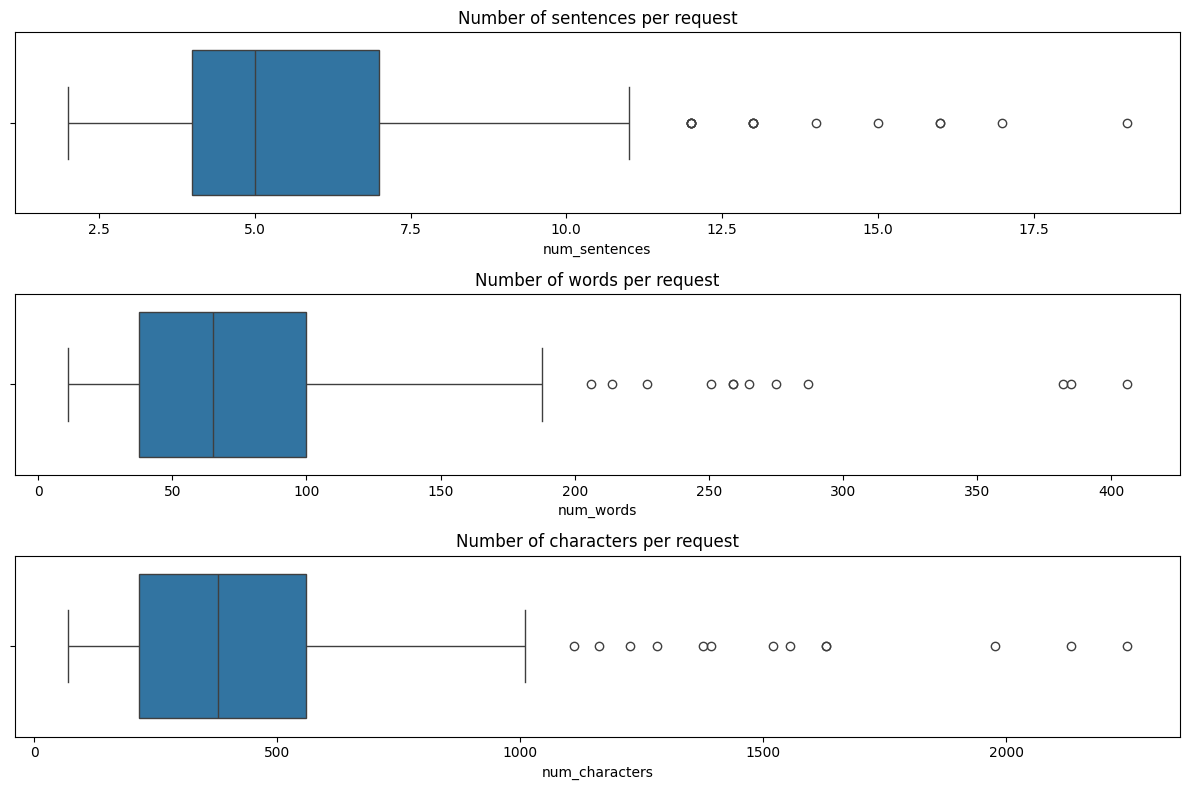

In [21]:
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
sns.boxplot(x=requests_df['num_sentences']).set_title("Number of sentences per request")

plt.subplot(3, 1, 2)
sns.boxplot(x=requests_df['num_words']).set_title("Number of words per request")

plt.subplot(3, 1, 3)
sns.boxplot(x=requests_df['num_characters']).set_title("Number of characters per request")

plt.tight_layout()
plt.show()

In [19]:
requests_df.query("num_characters > 1000 & num_sentences > 10 & num_words > 180")

,request,request_tags,group,types,genres,specificity,similar_isbn,similar_author,dissimilar_isbn,dissimilar_author,num_sentences,num_words,num_characters
id,,,,,,,,,,,,,
10018,looking for advice from nabokov lovers... hey ...,looking for advice from nabokov lovers... hey ...,Nabokov!,[author],"[literature, prose biography]",narrow,[],[],[],[],16,186,1110
57578,Indo Europeans. This summer semester before I ...,Indo Europeans. This summer semester before I ...,Ancient History,[subject],[religion history linguistics social science],narrow,"[0801834139, 0500276161, 0691058873]",[],[],[],11,206,1163
63177,Stephen A Douglas. Not sure if many of you are...,Stephen A Douglas. Not sure if many of you are...,Abraham Lincoln & Lincolniana,[subject],[history military biography],narrow,[0252066359],[],[],[],13,265,1377
65140,Edgar Allan Poe. It is a beautiful morning tod...,Edgar Allan Poe. It is a beautiful morning tod...,The Chapel of the Abyss,[subject],[biography],narrow,[],[],[],[],13,275,1556
82590,Martin Luther King Day Book List. In honor of ...,Martin Luther King Day Book List. In honor of ...,History Fans,"[subject, author]",[politics religion biography],narrow,"[0736684913, 0062504908, 0224026038, 080700573...",[],[],[],12,251,1392
83249,"Australian Literature & ""Place""? Hey everyone,...","Australian Literature & ""Place""? Hey everyone,...",Australian LibraryThingers,[subject],[literature geography],broad,[],[],[],[],17,406,2249
87258,Good books on the Pacific War. Like many Ameri...,Good books on the Pacific War. Like many Ameri...,History Fans,[subject],[history military],broad,[],[],[],[],16,382,2133
92994,What is it that I like about Ludlum? I'm looki...,What is it that I like about Ludlum? I'm looki...,"Crime, Thriller & Mystery",[author],"[literature, prose, mystery, crime, suspense]",narrow,[],[],[],[],13,287,1520
98936,Suggestions for Books on Jefferson Davis. I ju...,Suggestions for Books on Jefferson Davis. I ju...,American Civil War,[subject],[biography],narrow,"[0700605673, 0700607188]",[hudson strode],[0375725423],[],15,227,1282


In [20]:
requests_sample = requests_df[~((requests_df['num_characters'] > 1000) & 
                            (requests_df['num_sentences'] > 10) & 
                            (requests_df['num_words'] > 180))]

In [22]:
requests_sample['num_sentences'] = requests_sample['request'].apply(calculate_sentences)
requests_sample['num_words'] = requests_sample['request'].apply(calculate_words)
requests_sample['num_characters'] = requests_sample['request'].apply(calculate_characters)

/var/folders/4_/xr61ghq90pn4fd9d7j1yygn00000gn/T/ipykernel_28877/2611188990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  requests_sample['num_sentences'] = requests_sample['request'].apply(calculate_sentences)
/var/folders/4_/xr61ghq90pn4fd9d7j1yygn00000gn/T/ipykernel_28877/2611188990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  requests_sample['num_words'] = requests_sample['request'].apply(calculate_words)
/var/folders/4_/xr61ghq90pn4fd9d7j1yygn00000gn/T/ipykernel_28877/2611188990.py:3: Sett

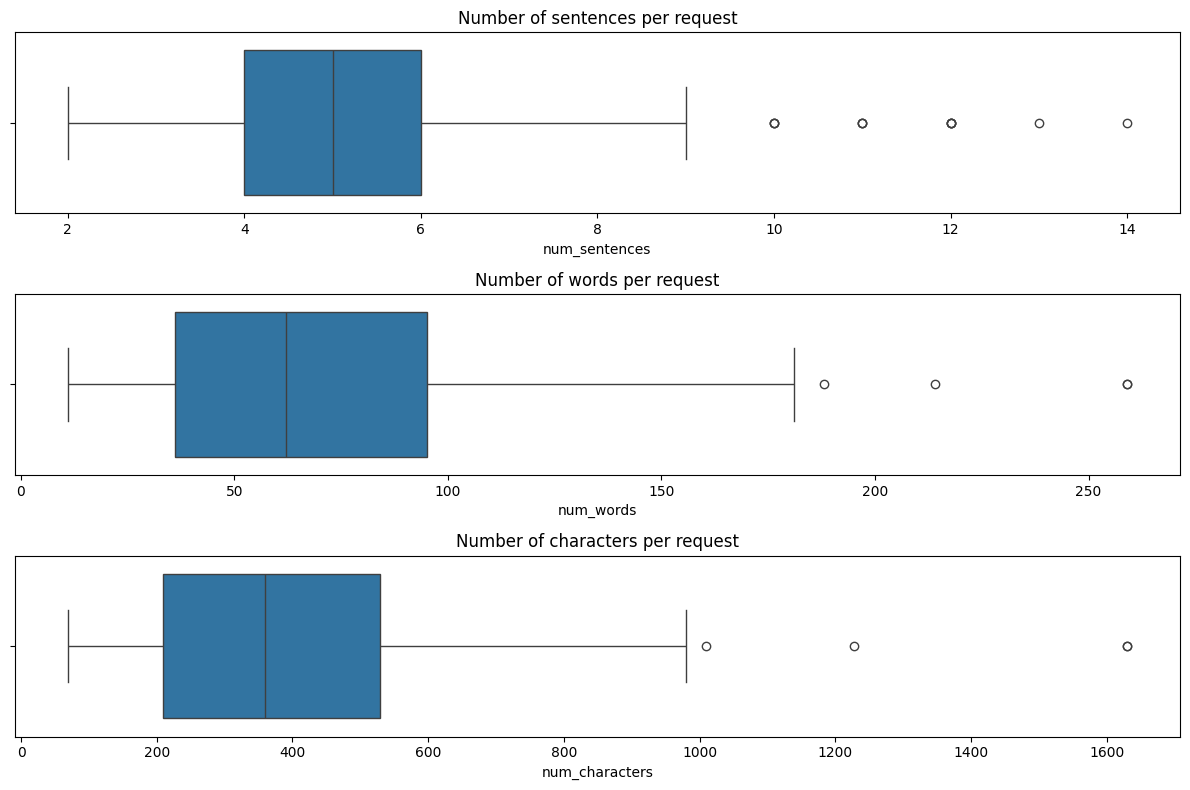

In [23]:
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
sns.boxplot(x=requests_sample['num_sentences']).set_title("Number of sentences per request")

plt.subplot(3, 1, 2)
sns.boxplot(x=requests_sample['num_words']).set_title("Number of words per request")

plt.subplot(3, 1, 3)
sns.boxplot(x=requests_sample['num_characters']).set_title("Number of characters per request")

plt.tight_layout()
plt.show()

requests_sample = request

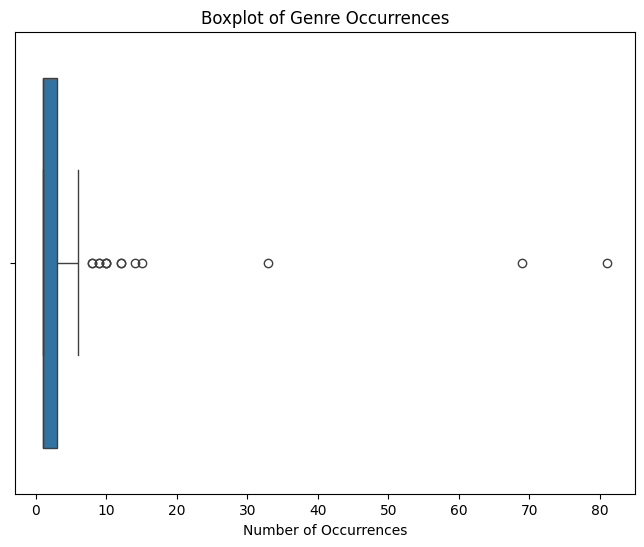

In [24]:
genre_occurrences = requests_df['genres'].explode().value_counts()
plt.figure(figsize=(8, 6))
sns.boxplot(x=genre_occurrences.values)
plt.title("Boxplot of Genre Occurrences")
plt.xlabel("Number of Occurrences")
plt.show()

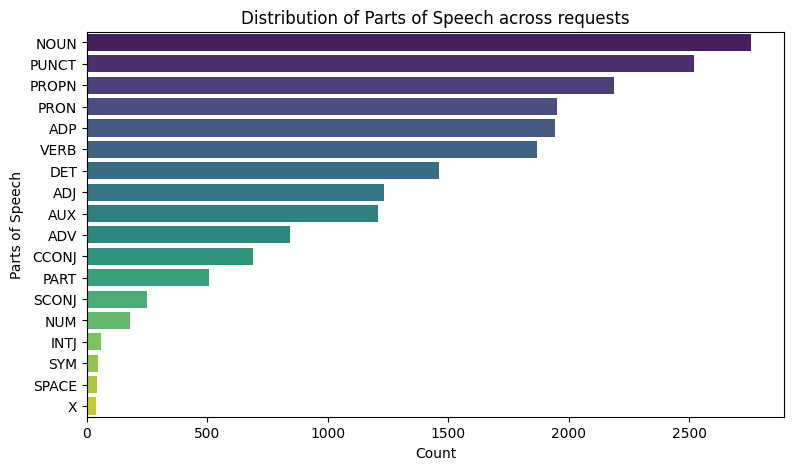

In [31]:
# 2. Bar chart for Parts of Speech
sorted_pos_labels = dict(sorted(pos_labels.items(), key=lambda item: item[1], reverse=True))

# Horizontal bar plot
plt.figure(figsize=(9, 5))
sns.barplot(x=list(sorted_pos_labels.values()), y=list(sorted_pos_labels.keys()), hue=list(sorted_pos_labels.keys()), palette="viridis", dodge=False, legend=False)
plt.title("Distribution of Parts of Speech across requests")
plt.xlabel("Count")
plt.ylabel("Parts of Speech")
plt.show()

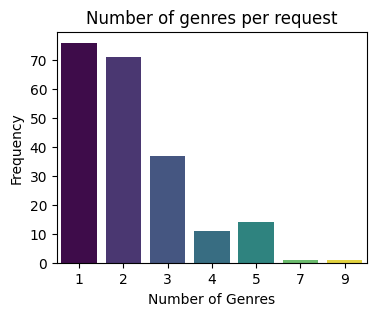

In [36]:
num_genres = requests_df['genres'].apply(len)

# Creating a bar chart instead of a histogram
plt.figure(figsize=(4, 3))
sns.countplot(x=num_genres, hue=num_genres, dodge=False, legend=False, palette="viridis")
plt.title("Number of genres per request")
plt.xlabel("Number of Genres")
plt.ylabel("Frequency")
plt.show()

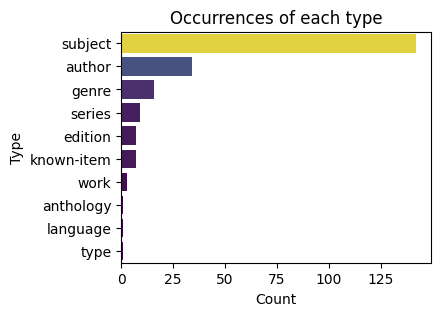

In [40]:
type_occurrences = requests_df['types'].explode().value_counts()
plt.figure(figsize=(4, 3))
sns.barplot(x=type_occurrences.values, y=type_occurrences.index, hue=type_occurrences.values, dodge=False, legend=False, palette="viridis")
plt.title("Occurrences of each type")
plt.xlabel("Count")
plt.ylabel("Type")
plt.show()

In [53]:
genre_occurrences = requests_df['genres'].explode().value_counts()

genres_frequent = genre_occurrences[genre_occurrences >= 8]
genres_infrequent = genre_occurrences[genre_occurrences < 8]


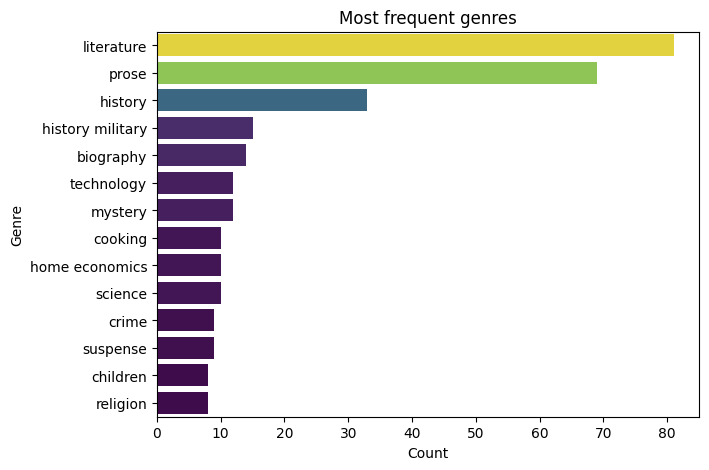

In [56]:
# Plotting genres that appear more than once
plt.figure(figsize=(7, 5))
sns.barplot(x=genres_frequent.values, y=genres_frequent.index, hue=genres_frequent.values, dodge=False, legend=False, palette="viridis")
plt.title("Most frequent genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

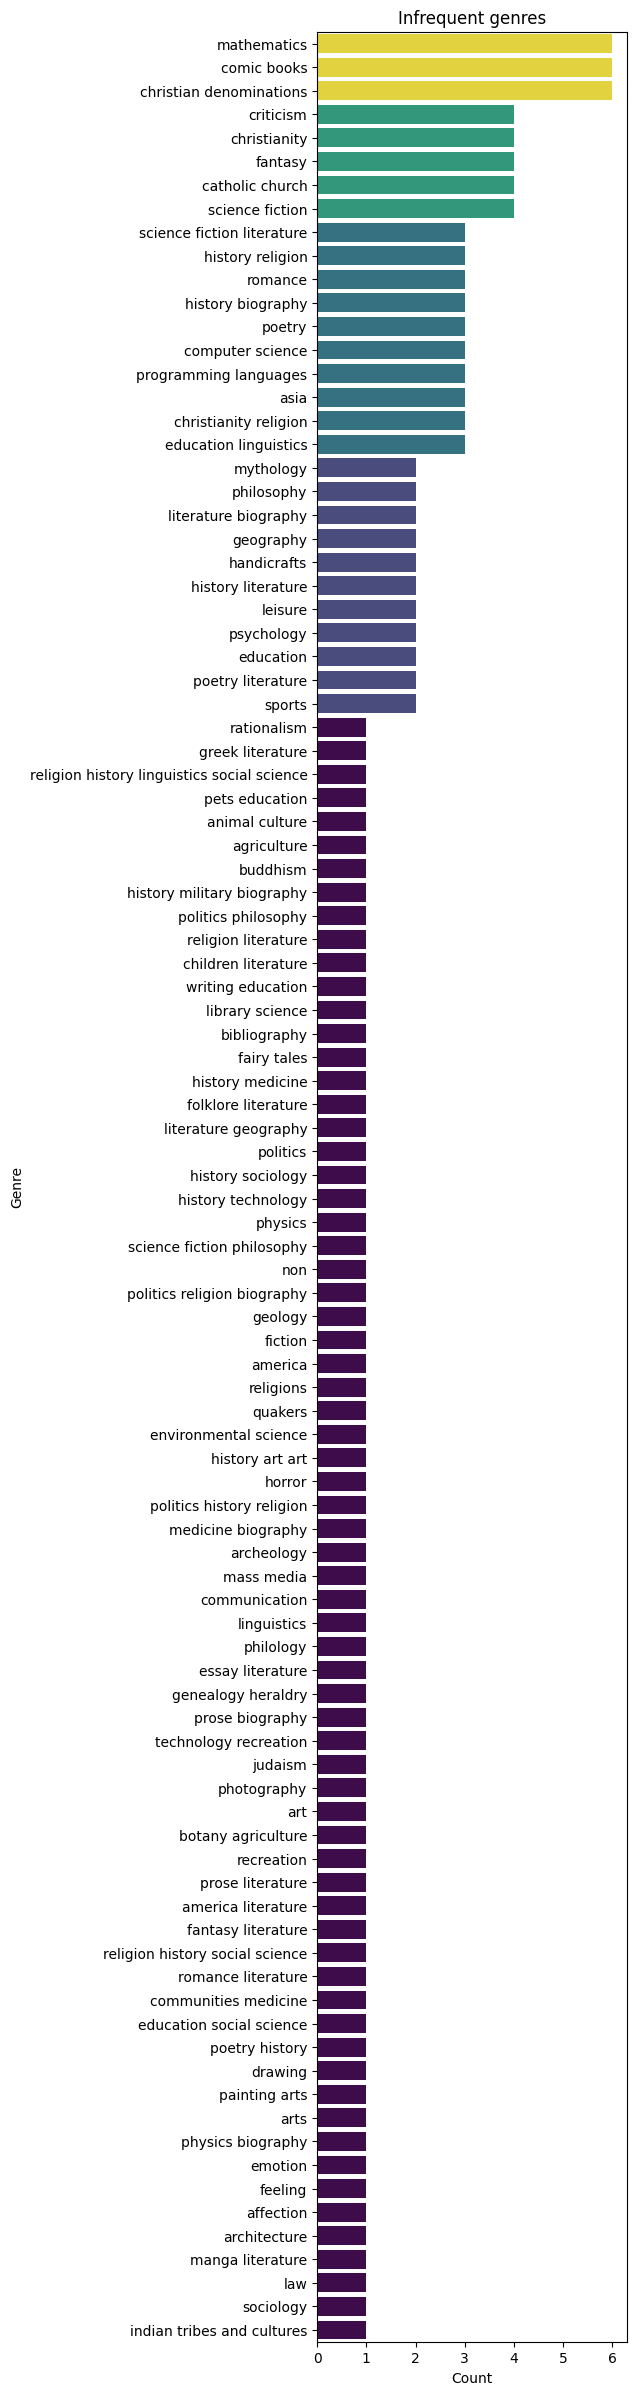

In [58]:
# Plotting genres that appear only once
plt.figure(figsize=(4, 30))
sns.barplot(x=genres_infrequent.values, y=genres_infrequent.index, hue=genres_infrequent.values, dodge=False, legend=False, palette="viridis")
plt.title("Infrequent genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

## QRELS

In [59]:
qrels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10179 entries, 0 to 10178
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   topic      10179 non-null  int64
 1   doc_id     10179 non-null  int64
 2   relevance  10179 non-null  int64
dtypes: int64(3)
memory usage: 238.7 KB


In [60]:
qrels_df.head()

,topic,doc_id,relevance
0,74,822942542,1
1,74,822959399,1
2,399,307236722,1
3,399,333511824,1
4,399,333511832,1
